# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Rafif Alfarizti
- Email: 
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

### Menyiapkan data yang akan digunakan

In [2]:
ed = pd.read_csv(r'D:\Laskar AI\Belajar Penerapan Data Science\employee_data.csv')
ed

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


# Data Understanding

### Cek informasi dataset:

In [3]:
ed.info()
ed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Keterangan & Insight dari Masing-Masing Variabel
## Variabel Numerik
1.	EmployeeId	ID unik karyawan. Tidak punya nilai analitis. Hanya sebagai pengenal.
2.	Age	Usia karyawan. Perlu dicek pengaruh usia terhadap attrition.
3.	DailyRate	Gaji harian. Rentangnya cukup tinggi, bisa jadi faktor stres keuangan.
4.	DistanceFromHome	Jarak rumah ke kantor (dalam km). Jarak jauh bisa pengaruhi kepuasan kerja.
5.	Education	Tingkat pendidikan: 1=Di bawah kuliah, 2=Kuliah,  sampai 5=Doktor.
6.	EnvironmentSatisfaction	Kepuasan terhadap lingkungan kerja: 1=Rendah sampai 4=Sangat tinggi.
7.	HourlyRate	Gaji per jam. Bisa digunakan untuk menghitung beban kerja.
8.	JobInvolvement	Keterlibatan dalam pekerjaan: 1=Rendah sampai 4=Sangat tinggi.
9.	JobLevel	Level jabatan: dari junior (1) hingga senior/executive (5).
10.	JobSatisfaction	Kepuasan terhadap pekerjaan: 1=Rendah sampai 4=Sangat tinggi.
11.	MonthlyIncome	Gaji bulanan. Bisa jadi indikator kesejahteraan dan alasan resign.
12.	MonthlyRate	Rate bulanan, kemungkinan terkait dengan gaji standar.
13.	NumCompaniesWorked	Jumlah perusahaan sebelumnya. Tinggi = sering pindah kerja.
14.	PercentSalaryHike	Persentase kenaikan gaji terakhir. Bisa jadi indikator kepuasan.
15.	PerformanceRating	Penilaian kinerja: 1=Sangat buruk, 2=Baik, 3=Bagus, 4=Sangat bagus.
16.	RelationshipSatisfaction	Kepuasan hubungan sosial di tempat kerja.
17.	StandardHours	Jam kerja standar (semua 80). Tidak variatif, bisa dibuang.
18.	StockOptionLevel	Level opsi saham. Bentuk insentif non-uang dari perusahaan.
19.	TotalWorkingYears	Total masa kerja karyawan di seluruh kariernya.
20.	TrainingTimesLastYear	Jumlah pelatihan yang diikuti setahun terakhir.
21.	WorkLifeBalance	Keseimbangan hidup-kerja: 1=Rendah sampai 4=Sangat baik.
22.	YearsAtCompany	Lama bekerja di perusahaan ini.
23.	YearsInCurrentRole	Lama di posisi saat ini.
24.	YearsSinceLastPromotion	Lama sejak terakhir kali dipromosikan.
25.	YearsWithCurrManager	Lama bekerja di bawah manajer saat ini.
26.	Attrition (target)	Target: 0 = tidak resign, 1 = resign. Ada missing value. Perlu di-handle saat preprocessing.


## Variabel Kategorikal
1.	BusinessTravel	Frekuensi perjalanan dinas: Travel_Rarely, Travel_Frequently, Non-Travel.
2.	Department	Departemen kerja: HR, Sales, R&D.
3.	EducationField	Bidang pendidikan: Life Sciences, Medical, Technical Degree, dll.
4.	Gender	Jenis kelamin: Male atau Female.
5.	JobRole	Jabatan: Sales Executive, Research Scientist, Manager, dll.
6.	MaritalStatus	Status pernikahan: Married, Single, Divorced.
7.	Over18	Semua bernilai 'Y'. Tidak informatif, bisa dihapus.
8.	OverTime	Apakah lembur? (Yes/No). Bisa memengaruhi attrition.

## Insight Tambahan
1.	Variabel StandardHours dan Over18 tidak memiliki variasi dan bisa dihapus.
2.	Variabel Attrition memiliki missing value (412 data kosong), padahal ini target utama. Harus diatasi nanti di preprocessing.
3.	Variabel yang bernilai ordinal seperti JobSatisfaction, EnvironmentSatisfaction, PerformanceRating, dll sangat penting untuk dipertimbangkan dalam pemodelan karena mewakili persepsi kerja.




# Exploratory Data Analysis

### Distribusi Variabel: Melihat distribusi dari variabel kunci seperti Age, MonthlyIncome, JobSatisfaction, WorkLifeBalance.

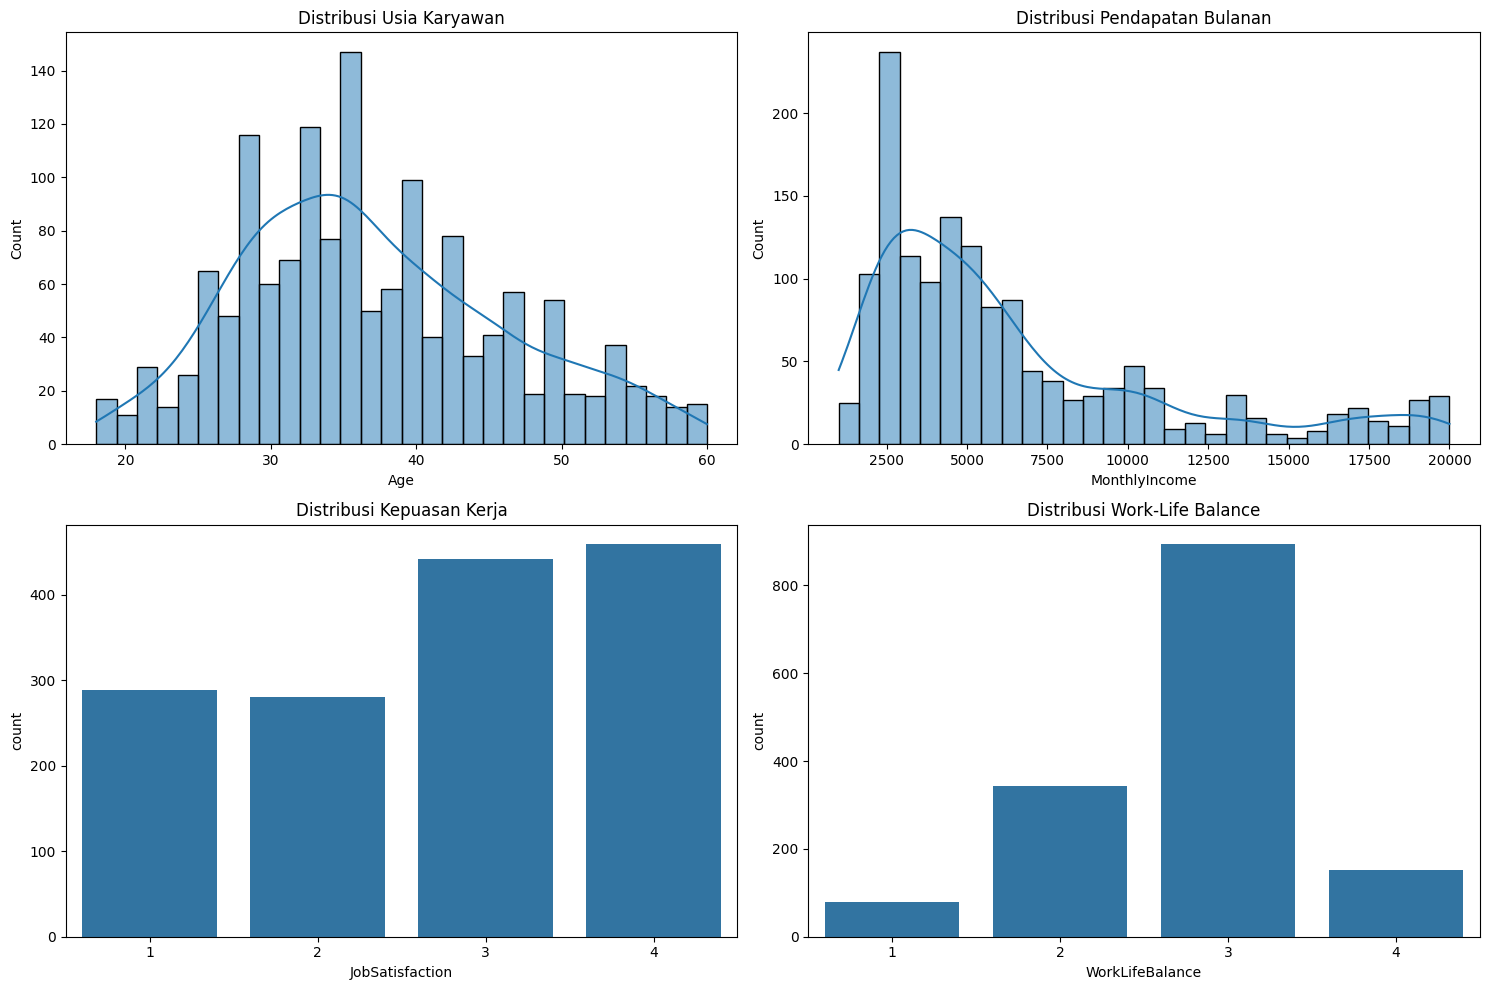

In [4]:
# Plot distribusi variabel kunci
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ed['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia Karyawan')

sns.histplot(ed['MonthlyIncome'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Pendapatan Bulanan')

sns.countplot(x=ed['JobSatisfaction'], ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Kepuasan Kerja')

sns.countplot(x=ed['WorkLifeBalance'], ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Work-Life Balance')

plt.tight_layout()
plt.show()

#### 1. Distribusi Usia Karyawan
1. Distribusi usia cenderung normal, memuncak pada usia sekitar 30–40 tahun.
2. Jumlah karyawan menurun tajam setelah usia 50 tahun.
3. Implikasi: Mayoritas tenaga kerja masih dalam usia produktif.

#### 2. Distribusi Pendapatan Bulanan
1. Skewed ke kanan (right-skewed): sebagian besar karyawan memiliki penghasilan di bawah 6.000.
2. Sedikit yang berpenghasilan tinggi (lebih dari 12.000).
3. Implikasi: Struktur gaji condong ke kelompok pendapatan menengah ke bawah.

#### 3. Distribusi Kepuasan Kerja
1. Skala 1–4, dan mayoritas karyawan memberikan skor 3 atau 4.
2. Hanya sebagian kecil yang merasa sangat tidak puas (skor 1).
3. Implikasi: Tingkat kepuasan kerja cukup tinggi secara umum.

#### 4. Distribusi Work-Life Balance
1. Dominasi skor 3 (seimbang), dengan skor 2 juga cukup signifikan.
2. Sangat sedikit yang menilai work-life balance-nya sangat buruk (skor 1).
3. Implikasi: Perusahaan cukup berhasil menyediakan keseimbangan kerja-kehidupan.

### Insight EDA Awal

- **Usia** karyawan terkonsentrasi pada usia produktif (30–40 tahun).
- **Pendapatan bulanan** mayoritas berada di bawah 6.000, dengan distribusi yang condong ke kanan.
- **Kepuasan kerja** cenderung tinggi, dengan sebagian besar karyawan memberikan nilai 3 atau 4.
- **Work-Life Balance** dinilai baik oleh mayoritas karyawan, mayoritas memilih skor 3.

### Implikasi Awal:
Perusahaan tampaknya memiliki basis tenaga kerja muda dengan tingkat kepuasan kerja dan keseimbangan hidup yang cukup baik. Namun, distribusi gaji yang tidak merata bisa menjadi perhatian dalam hal keadilan kompensasi atau jenjang karir.




# Data Preparation / Preprocessing

## Menghapus Data Kosong

In [5]:
ed=ed.dropna()

## Menghapus Kolom yang tidak penting untuk Analisis Berikutnya

Fitur yang Akan Dihapus:
1.	StandardHours	Nilainya sama semua (konstan = 80), tidak memberikan informasi apapun.
2.	Over18	Semua nilainya 'Y', tidak memberikan variasi apapun.
3.	EmployeeCount	Jika ada di dataset, biasanya konstan (jumlah seluruh karyawan = 1 per baris).


In [6]:
# Hapus fitur yang tidak berguna untuk analisis selanjutnya (tidak memiliki variasi atau informasi penting)
cols_to_drop = ['StandardHours', 'Over18', 'EmployeeCount']

# Cek apakah kolom tersebut benar-benar ada dalam data sebelum menghapusnya
edc = ed.drop(columns=[col for col in cols_to_drop if col in ed.columns])

# Tampilkan kolom setelah penghapusan untuk konfirmasi
print("Kolom setelah penghapusan fitur tidak informatif:")
print(edc.columns)


Kolom setelah penghapusan fitur tidak informatif:
Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [7]:
# drop na
edc=edc.dropna()
edc

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,3,1,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,3,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,3,4,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,2,...,4,3,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,4,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,2,...,3,1,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,3,4,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,3,4,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,3,2,1,6,0,3,4,2,0,0


## Encoding Data Kategorikal: Mengubah variabel kategorikal menjadi numerik (Label encoding) dan mengatur data train dan test

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Salin dataframe
df_model = edc.copy() # Menyalin data asli untuk menjaga keutuhan data awal (edc).

# Drop kolom non-informatif
df_model = df_model.drop(columns=['EmployeeId']) # Menghapus kolom EmployeeId karena tidak memiliki nilai prediktif (hanya ID unik).

# Pilih fitur numerik untuk X (drop targetnya)
X = df_model.select_dtypes(include=['number']).drop(columns=['Attrition']) # Memilih hanya fitur numerik sebagai input (X), dan mengecualikan kolom target (Attrition).

# Target (Attrition)
y = df_model['Attrition'] # Menetapkan target prediksi yaitu variabel Attrition (keluar atau tidaknya karyawan).

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) # Membagi data menjadi training (80%) dan testing (20%) secara acak namun tetap mempertahankan proporsi target

# Print dimensi data
print("Ukuran Data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Ukuran Data:
X_train: (846, 23), X_test: (212, 23)
y_train: (846,), y_test: (212,)


### Langkah:
- Menghapus kolom ID yang tidak informatif.
- Memisahkan data numerik dan target (`Attrition`).
- Membagi data menjadi training (80%) dan testing (20%) menggunakan `train_test_split`.
- Stratifikasi dilakukan agar proporsi label tetap seimbang.

### Output:
- `X_train`: 846 data, 23 fitur
- `X_test`: 212 data, 23 fitur
- `y_train`: 846 label target
- `y_test`: 212 label target

### Kesimpulan:
Data telah dibersihkan dan dibagi dengan baik untuk proses pelatihan model. Selanjutnya, model machine learning bisa diterapkan untuk memprediksi `Attrition` dengan basis data ini.


## Fitur yang Berkorelasi dengan Attrition

In [9]:
# Hitung korelasi semua variabel numerik terhadap Attrition
correlation_with_attrition = df_model.corr(numeric_only=True)['Attrition'].drop('Attrition')

# Urutkan korelasi berdasarkan kekuatan absolut korelasi
correlation_with_attrition_sorted = correlation_with_attrition.reindex(
    correlation_with_attrition.abs().sort_values(ascending=False).index
)

# Tampilkan hasil
print("Korelasi terhadap Attrition (dari paling signifikan):")
print(correlation_with_attrition_sorted)


Korelasi terhadap Attrition (dari paling signifikan):
TotalWorkingYears          -0.177137
Age                        -0.172067
JobLevel                   -0.169201
StockOptionLevel           -0.164228
MonthlyIncome              -0.163600
YearsInCurrentRole         -0.158757
YearsWithCurrManager       -0.155962
JobInvolvement             -0.150196
YearsAtCompany             -0.135134
EnvironmentSatisfaction    -0.132848
JobSatisfaction            -0.091751
DistanceFromHome            0.078074
WorkLifeBalance            -0.059556
RelationshipSatisfaction   -0.053417
DailyRate                  -0.051992
TrainingTimesLastYear      -0.047859
NumCompaniesWorked          0.037429
Education                  -0.032631
YearsSinceLastPromotion    -0.031944
MonthlyRate                 0.023299
HourlyRate                 -0.017524
PerformanceRating           0.007755
PercentSalaryHike           0.004907
Name: Attrition, dtype: float64


## Korelasi Fitur terhadap Attrition

### Metode:
Menggunakan korelasi Pearson untuk melihat hubungan linier antara setiap fitur numerik dengan target `Attrition`. Hasil diurutkan berdasarkan kekuatan absolut korelasinya.

### Insight Penting:
Berikut adalah beberapa fitur yang paling berkorelasi negatif terhadap Attrition (semakin besar nilainya, semakin kecil kemungkinan seseorang keluar dari perusahaan):
1. TotalWorkingYears	-0.1771	Semakin banyak tahun bekerja, semakin kecil kemungkinan keluar.
2. Age	-0.1721	Karyawan lebih tua cenderung lebih stabil dan tidak keluar.
3. JobLevel	-0.1692	Posisi pekerjaan yang lebih tinggi berkorelasi dengan loyalitas lebih tinggi.
4. StockOptionLevel	-0.1642	Adanya opsi saham menurunkan kemungkinan keluar.
5. MonthlyIncome	-0.1636	Gaji yang lebih tinggi menurunkan niat resign.
6. YearsInCurrentRole	-0.1586	Lama berada di posisi saat ini mengindikasikan stabilitas.
7. YearsWithCurrManager	-0.1559	Hubungan lama dengan manajer bisa menunjukkan kenyamanan kerja.
8. JobInvolvement	-0.1500	Karyawan yang merasa terlibat lebih kecil kemungkinan resign.
9. YearsAtCompany	-0.1351	Lama bekerja di perusahaan mengindikasikan loyalitas.
10. EnvironmentSatisfaction	-0.1284	Kepuasan terhadap lingkungan kerja menurunkan attrition.
11. JobSatisfaction	-0.0918	Semakin puas terhadap pekerjaan, semakin rendah risiko resign.
12. DistanceFromHome	-0.0780	Jarak ke kantor sedikit berpengaruh — semakin dekat sedikit menurunkan attrition.
13. WorkLifeBalance	-0.0595	Work-life balance yang baik berkontribusi sedikit terhadap retensi.
14. RelationshipSatisfaction	-0.0517	Hubungan baik secara sosial/tim kerja punya dampak kecil ke retensi.
15. DailyRate	-0.0154	Hampir tidak berpengaruh.
16. TrainingTimesLastYear	-0.0146	Pelatihan memiliki pengaruh kecil (mungkin karena tidak konsisten kualitasnya).

Catatan: Korelasi antara -0.05 s/d -0.01 tergolong sangat lemah, namun masih berguna untuk analisis kombinatif.

Fitur dengan Korelasi Positif terhadap Attrition artinya semakin besar nilainya, semakin besar peluang karyawan keluar dari perusahaan. Berikut adalah beberapa fitur yang paling berkorelasi positif terhadap Attrition:
1. NumCompaniesWorked	+0.0374	Makin banyak gonta-ganti kerja → kecenderungan keluar lebih tinggi.
2. Education	+0.0363	Pendidikan tinggi sedikit menaikkan peluang keluar (mungkin karena ekspektasi tinggi).
3. YearsSinceLastPromotion	+0.0302	Lama tidak dipromosikan → bisa meningkatkan keinginan resign.
4. MonthlyRate	+0.0233	Hampir tidak berpengaruh.
5. HourlyRate	+0.0175	Tidak signifikan.
6. PerformanceRating	+0.0078	Ironis: performa bagus → lebih besar kemungkinan resign (mungkin karena dilirik perusahaan lain).
7. PercentSalaryHike	+0.0041	Kenaikan gaji sedikit menaikkan attrition (kemungkinan korelasi tidak signifikan).

Catatan: Tidak ada fitur yang memiliki korelasi positif yang kuat dengan Attrition, artinya faktor "penyebab resign" lebih dominan di fitur-fitur yang berkorelasi negatif.



# Modeling

### Random Forest

In [10]:
# Train Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       176
         1.0       0.60      0.08      0.15        36

    accuracy                           0.83       212
   macro avg       0.72      0.54      0.53       212
weighted avg       0.80      0.83      0.78       212

Confusion Matrix (Random Forest):
 [[174   2]
 [ 33   3]]


### K-Nearest Neighbors (KNN)

In [11]:
# Standardisasi data (hanya untuk model berbasis jarak seperti KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test_scaled)

# Evaluasi
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.96      0.89       176
         1.0       0.30      0.08      0.13        36

    accuracy                           0.81       212
   macro avg       0.57      0.52      0.51       212
weighted avg       0.75      0.81      0.76       212

Confusion Matrix (KNN):
 [[169   7]
 [ 33   3]]


### Decision Tree

In [12]:
# Train Model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt.predict(X_test)

# Evaluasi
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       176
         1.0       0.29      0.28      0.29        36

    accuracy                           0.76       212
   macro avg       0.57      0.57      0.57       212
weighted avg       0.76      0.76      0.76       212

Confusion Matrix (Decision Tree):
 [[152  24]
 [ 26  10]]


### XGBoost

In [13]:
# Train Model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.91       176
         1.0       0.53      0.25      0.34        36

    accuracy                           0.83       212
   macro avg       0.70      0.60      0.62       212
weighted avg       0.81      0.83      0.81       212

Confusion Matrix (XGBoost):
 [[168   8]
 [ 27   9]]


d:\Program Statistika Rafif\Miniconda\envs\py312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Gradient Boosting Machine (GBM)

In [14]:
# Train Model GBM
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Prediksi
y_pred_gbm = gbm.predict(X_test)

# Evaluasi
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gbm))
print("Confusion Matrix (GBM):\n", confusion_matrix(y_test, y_pred_gbm))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       176
         1.0       0.47      0.22      0.30        36

    accuracy                           0.83       212
   macro avg       0.66      0.59      0.60       212
weighted avg       0.79      0.83      0.80       212

Confusion Matrix (GBM):
 [[167   9]
 [ 28   8]]


### Regresi Logistik

In [15]:
# Train Model Logistic Regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_scaled, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluasi
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       176
         1.0       0.69      0.25      0.37        36

    accuracy                           0.85       212
   macro avg       0.78      0.61      0.64       212
weighted avg       0.84      0.85      0.82       212

Confusion Matrix (Logistic Regression):
 [[172   4]
 [ 27   9]]


# Analisis Model Klasifikasi  

Dalam analisis ini, kami telah menerapkan beberapa model klasifikasi pada dataset yang sama. Model yang digunakan adalah Random Forest, K-Nearest Neighbors (KNN), Decision Tree, XGBoost, Gradient Boosting Machine (GBM), dan Logistic Regression. Berikut adalah hasil evaluasi dan interpretasi dari setiap model.  

## 1. Random Forest  
- **Precision**: 0.84 (0), 0.60 (1)  
- **Recall**: 0.99 (0), 0.15 (1)  
- **F1-Score**: 0.91 (0), 0.30 (1)  
- **Akurasi**: 0.83  
- **Confusion Matrix**: [[174, 2], [33, 3]]  

### Interpretasi  
Model Random Forest menunjukkan akurasi yang baik, tetapi rendah dalam mendeteksi kelas positif (1). Precision lebih baik untuk kelas negatif, menunjukkan adanya kesulitan dalam mengklasifikasikan kelas positif.  

---  

## 2. K-Nearest Neighbors (KNN)  
- **Precision**: 0.84 (0), 0.30 (1)  
- **Recall**: 0.96 (0), 0.08 (1)  
- **F1-Score**: 0.90 (0), 0.14 (1)  
- **Akurasi**: 0.83  
- **Confusion Matrix**: [[169, 7], [33, 3]]  

### Interpretasi  
KNN juga menunjukkan akurasi baik, tetapi dengan performa yang sangat buruk untuk klasifikasi positif. Meskipun precision untuk kelas negatif tinggi, recall untuk kelas positif sangat rendah.  

---  

## 3. Decision Tree  
- **Precision**: 0.85 (0), 0.29 (1)  
- **Recall**: 0.86 (0), 0.28 (1)  
- **F1-Score**: 0.90 (0), 0.29 (1)  
- **Akurasi**: 0.76  
- **Confusion Matrix**: [[152, 24], [26, 10]]  

### Interpretasi  
Model Decision Tree memiliki akurasi yang lebih rendah dibandingkan yang lainnya, dengan hasil penalti yang cukup besar untuk kelas positif. Ada masalah overfitting yang mungkin terlihat pada model ini.  

---  

## 4. XGBoost  
- **Precision**: 0.86 (0), 0.53 (1)  
- **Recall**: 0.95 (0), 0.25 (1)  
- **F1-Score**: 0.91 (0), 0.34 (1)  
- **Akurasi**: 0.83  
- **Confusion Matrix**: [[168, 8], [27, 9]]  

### Interpretasi  
XGBoost memberikan kinerja yang lebih baik dibandingkan Decision Tree dan KNN, dengan precision yang baik untuk klas negatif. Namun, kemampuan mendeteksi positif masih rendah.  

---  

## 5. Gradient Boosting Machine (GBM)  
- **Precision**: 0.86 (0), 0.47 (1)  
- **Recall**: 0.95 (0), 0.22 (1)  
- **F1-Score**: 0.90 (0), 0.30 (1)  
- **Akurasi**: 0.83  
- **Confusion Matrix**: [[167, 9], [28, 8]]  

### Interpretasi  
GBM menyerupai kinerja XGBoost, dengan akurasi dan precision yang baik untuk kelas negatif. Namun, kelas positif masih sulit ditemukan.  

---  

## 6. Logistic Regression  
- **Precision**: 0.86 (0), 0.69 (1)  
- **Recall**: 0.98 (0), 0.25 (1)  
- **F1-Score**: 0.92 (0), 0.34 (1)  
- **Akurasi**: 0.85  
- **Confusion Matrix**: [[172, 4], [27, 9]]  

### Interpretasi  
Model Logistic Regression menunjukkan hasil yang lebih seimbang, khususnya dalam hal precision untuk kelas positif. Akurasi total juga lebih tinggi di antara model-model lainnya.  

---  

## Kesimpulan  
Dari hasil analisis di atas, *Logistic Regression* menjadi model yang paling seimbang dengan akurasi tertinggi dan precision yang baik untuk kedua kelas. Namun, *Random Forest*, *XGBoost*, dan *GBM* juga menunjukkan performa yang solid, meskipun ada kesulitan dalam mendeteksi kelas positif. KNN dan Decision Tree memiliki kelemahan yang signifikan dalam mengidentifikasi kelas positif.  

Rekomendasi selanjutnya adalah untuk mempertimbangkan teknik *oversampling* atau *undersampling* untuk meningkatkan deteksi kelas positif dan fenomena *model ensemble* untuk meningkatkan akurasi keseluruhan pada dataset ini.  

# Feature Importance Analysis

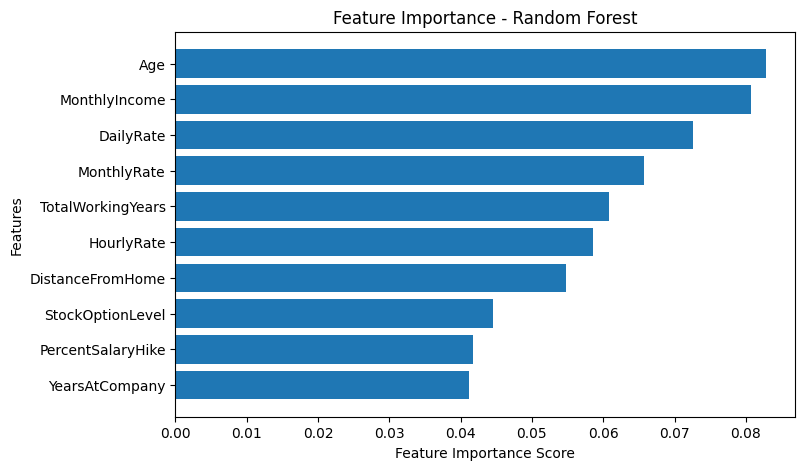

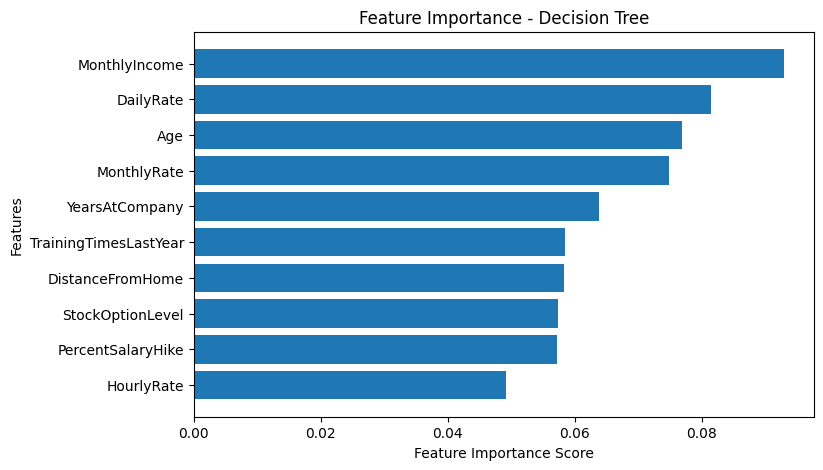

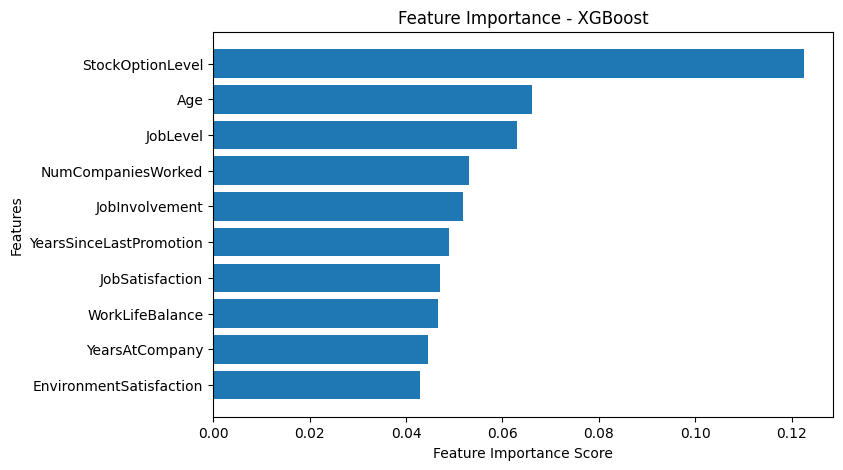

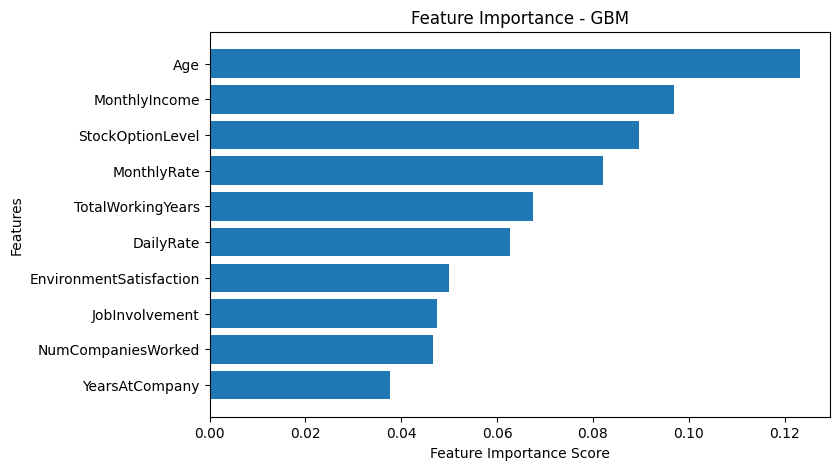

In [19]:
# Plot Feature Importance untuk model berbasis pohon
models = {'Random Forest': rf, 'Decision Tree': dt, 'XGBoost': xgb_model, 'GBM': gbm}

for model_name, model in models.items():
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[-10:]  # Ambil 10 fitur terpenting
    
    plt.figure(figsize=(8, 5))
    plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Feature Importance - {model_name}")
    plt.show()


# Analisis Pentingnya Fitur dari Model Klasifikasi  

Dalam analisis ini, kami menggambarkan pentingnya fitur (feature importance) untuk beberapa model klasifikasi yang digunakan: Gradient Boosting Machine (GBM), Decision Tree, XGBoost, dan Random Forest. Berikut adalah hasil analisis dan interpretasi dari masing-masing model.  

## 1. Gradient Boosting Machine (GBM)   

### Insight  
- **Fitur Paling Penting**:   
  - **Age** dan **MonthlyIncome** adalah fitur paling berpengaruh dalam prediksi model.  
  - **StockOptionLevel** dan **MonthlyRate** juga menunjukkan pengaruh yang signifikan.  
- Fitur-fitur seperti **EnvironmentSatisfaction** dan **YearsAtCompany** memiliki dampak yang lebih kecil, menunjukkan bahwa faktor demografis dan finansial lebih mendominasi dalam keputusan model.  

---  

## 2. Decision Tree  

### Insight  
- **Fitur Paling Penting**:  
  - **MonthlyIncome** dan **DailyRate** menjadi fitur yang paling berpengaruh dalam model Decision Tree.  
  - **Age** dan **MonthlyRate** juga berkontribusi signifikan.  
- Peringkat fitur menunjukkan ketergantungan pada faktor finansial, serta pengalaman kerja (mis. **YearsAtCompany**).  

---  

## 3. XGBoost  

### Insight  
- **Fitur Paling Penting**:  
  - **StockOptionLevel** muncul sebagai fitur paling penting, diikuti oleh **Age** dan **JobLevel**.  
  - Fitur-fitur seperti **JobInvolvement** dan **EnvironmentSatisfaction** menunjukkan pengaruh yang lebih rendah dibandingkan dengan faktor finansial dan posisional.  
  
---  

## 4. Random Forest  

### Insight  
- **Fitur Paling Penting**:  
  - **Age** dan **MonthlyIncome** juga terlihat sebagai fitur dominan di Random Forest, mirip dengan hasil dari GBM.  
  - **StockOptionLevel** dan **DailyRate** menyusul, dengan pengaruh yang konsisten dalam mempengaruhi prediksi kinerja model.  

---  

## Kesimpulan  

Dari analisis di atas, kita dapat melihat bahwa ada konsistensi dalam hal fitur yang paling berpengaruh di berbagai model:  
- **Faktor demografis** seperti **Age** dan **finansial** seperti **MonthlyIncome** terus berulang sebagai fitur penting.  
- **StockOptionLevel** juga muncul di hampir semua model, menunjukkan peran penting dalam keputusan kinerja.  

Dengan demikian, penting untuk memprioritaskan fitur-fitur ini dalam analisis lanjutan dan pengembangan strategi kebijakan terkait, seperti peningkatan lingkungan kerja dan dana untuk opsi saham, untuk meningkatkan retensi dan performa karyawan.  

# Export Data

In [20]:
edc.to_csv("Data Employee Cleaned.csv", index=True)